In [1]:
# @title Get model coordinates
import plotly.express as px
import pandas as pd
import numpy as np

coor = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pontevedra_Ria/input_files/distan_lat42.4lon-8.7p3R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [2]:
# @title Get station and sample max gust hour before
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pontevedra_Ria/input_files/marin.csv", usecols = ["time","gust_mar"],parse_dates=["time"]).set_index("time")


#delete duplicated
station = station[~station.index.duplicated(keep='first')]

#resample max hour before

station = station.resample("H",label="right",closed="right").max()
print("Variable statistics")
print(station.describe())

Variable statistics
           gust_mar
count  17472.000000
mean       5.828460
std        3.878612
min        0.560000
25%        2.810000
50%        4.890000
75%        7.750000
max       27.830000


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16606 entries, 2022-01-01 01:00:00 to 2023-12-30 23:00:00
Data columns (total 76 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gust_o       16606 non-null  float64
 1   dir0         16606 non-null  float64
 2   snow_prec0   16606 non-null  float64
 3   snowlevel0   16606 non-null  float64
 4   mod0         16606 non-null  float64
 5   wind_gust0   16606 non-null  float64
 6   mslp0        16606 non-null  float64
 7   temp0        16606 non-null  float64
 8   rh0          16606 non-null  float64
 9   visibility0  16606 non-null  float64
 10  lhflx0       16606 non-null  float64
 11  lwflx0       16606 non-null  float64
 12  conv_prec0   16606 non-null  float64
 13  prec0        16606 non-null  float64
 14  swflx0       16606 non-null  float64
 15  shflx0       16606 non-null  float64
 16  cape0        16606 non-null  float64
 17  cin0         16606 non-null  float64
 18  cfh0       

None

best correlation observed and meteorological model variables
gust_o        1.000000
wind_gust0    0.832028
wind_gust2    0.826658
wind_gust1    0.821115
mod2          0.819031
mod0          0.792965
mod1          0.747249
cape1         0.348194
lhflx2        0.344460
cape0         0.340149
Name: gust_o, dtype: float64


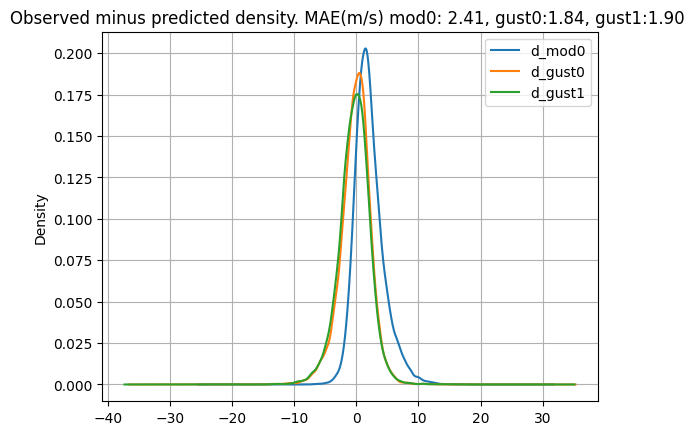

In [6]:
# @title Get meteorologic model d0 .Concatenate with station. MAE (m/s) meteorological model variables and observed variables. Select best point and variable from the meteorological model

from sklearn.metrics import mean_absolute_error

#rename columns
station = station.rename(columns={"gust_mar":"gust_o"})

#load meteorological model
met_model = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pontevedra_Ria/input_files/lat42.4lon-8.7p3R1KmD0.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time").drop_duplicates()

df_all = pd.concat([station,met_model],axis=1).dropna()
display(df_all.info())

# best correlation observed and meteorological model
print("best correlation observed and meteorological model variables")
print(df_all.corr()["gust_o"].sort_values(ascending=False).head(10))

#errors (MAE) in m/s and differences
e_mod0= mean_absolute_error(df_all.gust_o, df_all.mod0)
d_mod0 = df_all.gust_o.values-df_all.mod0.values
e_mod1 = mean_absolute_error(df_all.gust_o, df_all.mod1)
d_mod1 = df_all.gust_o.values-df_all.mod1.values

e_gust0 = mean_absolute_error(df_all.gust_o, df_all.wind_gust0)
d_gust0 = df_all.gust_o.values-df_all.wind_gust0.values
e_gust1 = mean_absolute_error(df_all.gust_o, df_all.wind_gust1)
d_gust1 = df_all.gust_o.values-df_all.wind_gust1.values # lowest value
e_gust2 = mean_absolute_error(df_all.gust_o, df_all.wind_gust2)
d_gust2 = df_all.gust_o.values-df_all.wind_gust2.values

#Select best point and variable from the meteorological model
mae_met = round(e_gust1,2)

pd.DataFrame({"d_mod0":d_mod0,"d_mod0":d_mod0,"d_gust0":d_gust0,"d_gust1":d_gust1,
              }).plot(kind="kde", grid=True,
                      title ="Observed minus predicted density. MAE(m/s) mod0: {:0.2f}, gust0:{:0.2f}, gust1:{:0.2f} ".format(e_mod0,e_gust0,e_gust1));


machine learning number: 0
            y_test       y_pred         diff
count  1661.000000  1661.000000  1661.000000
mean      5.778519     5.856575     0.078056
std       3.846016     3.380371     1.968408
min       0.750000     1.751550    -9.810300
25%       2.830000     3.348100    -1.015950
50%       4.890000     4.905850     0.174750
75%       7.640000     7.304800     1.310350
max      26.690000    25.083150    10.845700
machine learning number: 1
            y_test       y_pred         diff
count  1661.000000  1661.000000  1661.000000
mean      5.808561     5.862622     0.054061
std       3.760474     3.314191     1.937235
min       0.720000     1.788400    -8.828600
25%       2.860000     3.300050    -1.047000
50%       5.030000     5.091100     0.186000
75%       7.670000     7.377850     1.213450
max      21.640000    20.503350     6.695800
machine learning number: 2
            y_test       y_pred         diff
count  1661.000000  1661.000000  1661.000000
mean      5.773582 

,MAE
count,10.00000
mean,1.49000
std,0.02582
min,1.47000
25%,1.47250
50%,1.48000
75%,1.50250
max,1.55000


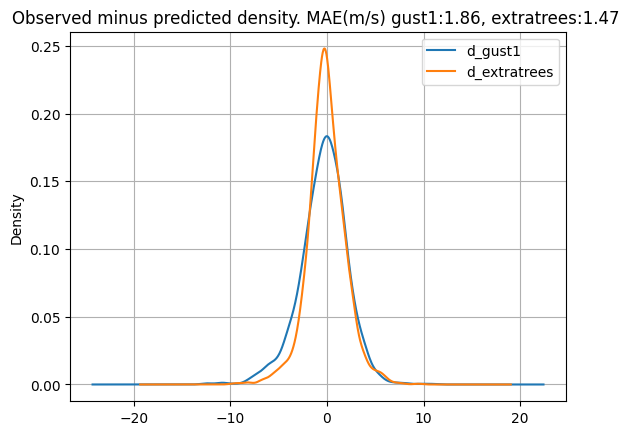

In [7]:
# @title Extratreesregressor


from sklearn.ensemble import ExtraTreesRegressor
from lightgbm.sklearn import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

#numpy randomseed
np.random.seed(1)

# target variable
Y = df_all.gust_o
X = df_all[["wind_gust0","mod0","wind_gust1","mod1","wind_gust2","mod2","prec0"]]

MAE = []
for t in range (0,10):
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, )
  ml_model = ExtraTreesRegressor(n_estimators=200).fit(X_train,y_train)
  y_pred = ml_model.predict(X_test)
  MAE.append(round(mean_absolute_error(y_test,y_pred),2))
  print("machine learning number:",t)
  df = pd.DataFrame({"y_test":y_test},index=y_test.index)
  df["y_pred"] = y_pred
  df["diff"] = df["y_pred"]-df["y_test"]
  print(df.describe())

print("Mean absolute value all machine learning models")
df_r=pd.DataFrame({"MAE":MAE,});
display(df_r.describe())

#show results last algorithm
df_results = pd.concat([df_all,df],axis=1).dropna()[["mod0","wind_gust1","y_test","y_pred"]]
df_results ["d_extratrees"]= df_results["y_test"]-df_results["y_pred"]
df_results ["d_gust1"] = df_results["y_test"]-df_results["wind_gust1"]
e_extratrees = mean_absolute_error(y_test,y_pred)
e_gust1 = mean_absolute_error(df_results.y_test.values,df_results.wind_gust1.values)
df_results[["d_gust1","d_extratrees"]].plot(kind="kde",grid=True, title = "Observed minus predicted density. MAE(m/s) gust1:{:0.2f}, extratrees:{:0.2f} ".format(e_gust1,e_extratrees));

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001754 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 14945, number of used features: 7
[LightGBM] [Info] Start training from score 5.889678
machine learning number: 0
            y_test       y_pred         diff
count  1661.000000  1661.000000  1661.000000
mean      5.778519     5.835277     0.056758
std       3.846016     3.378055     1.981567
min       0.750000     1.748666    -9.338322
25%       2.830000     3.303846    -1.027629
50%       4.890000     4.913401     0.118976
75%       7.640000     7.306153     1.236565
max      26.690000    20.808215    10.761370
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of dat

,MAE
count,10.000000
mean,1.483000
std,0.022136
min,1.450000
25%,1.470000
50%,1.480000
75%,1.495000
max,1.530000


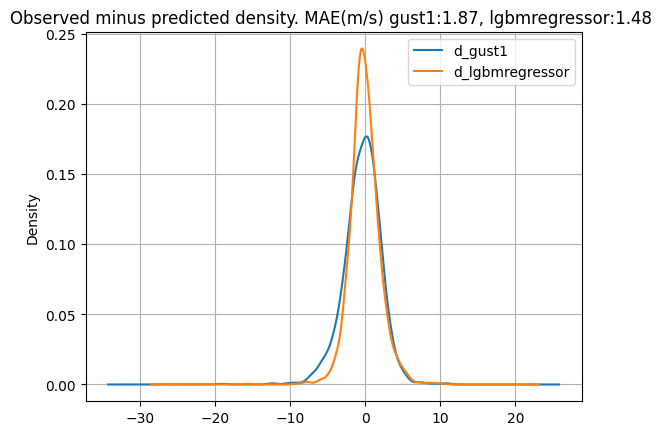

In [8]:
# @title LGBMRegressor

from lightgbm.sklearn import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

#numpy randomseed
np.random.seed(1)

# target variable
Y = df_all.gust_o
X = df_all[["wind_gust0","mod0","wind_gust1","mod1","wind_gust2","mod2","prec0"]]

MAE = []
for t in range (0,10):
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, )
  ml_model = LGBMRegressor(n_estimators=200).fit(X_train,y_train)
  y_pred = ml_model.predict(X_test)
  MAE.append(round(mean_absolute_error(y_test,y_pred),2))
  print("machine learning number:",t)
  df = pd.DataFrame({"y_test":y_test},index=y_test.index)
  df["y_pred"] = y_pred
  df["diff"] = df["y_pred"]-df["y_test"]
  print(df.describe())

print("Mean absolute value all machine learning models")
df_r=pd.DataFrame({"MAE":MAE,});
display(df_r.describe())

#show results last algorithm
df_results = pd.concat([df_all,df],axis=1).dropna()[["mod0","wind_gust1","y_test","y_pred"]]
df_results ["d_lgbmregressor"]= df_results["y_test"]-df_results["y_pred"]
df_results ["d_gust1"] = df_results["y_test"]-df_results["wind_gust1"]
e_lgbm = mean_absolute_error(y_test,y_pred)
e_gust1 = mean_absolute_error(df_results.y_test.values,df_results.wind_gust1.values)
d_lgbmregressor = df_results['d_lgbmregressor']
df_results[["d_gust1","d_lgbmregressor"]].plot(kind="kde",grid=True, title = "Observed minus predicted density. MAE(m/s) gust1:{:0.2f}, lgbmregressor:{:0.2f} ".format(e_gust1,e_lgbm));

In [9]:
# @title Shapiro test normality MAE samples tested
from scipy.stats import shapiro

sta, p = shapiro(MAE)
print("\np value:",p)
print("significance level alpha=0.01")

alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable MAE in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable MAE no normal distribution in samples")


p value: 0.2962610125541687
significance level alpha=0.01
Accept null hypothesis: normal distribution variable MAE in the samples


In [10]:
# @title T test (1sample) compare machine learning mean absolute error in a sample (n=10) versus meteorological model mean absolute error at point 1 (wind_gust1 =1.86). The alternative hypothesis is: the sample mean absolute error of the sample is less than the given population mean absolute error (popmean). Significance level (alpha) = 0.01

from scipy import stats

alpha = 0.01
sta0, p_value0 = stats.ttest_1samp(MAE, popmean=1.86, alternative="less")

print("MAE in test sample:",MAE)
if p_value0 < alpha:
    print("\nwe are rejecting null hypothesis  H0: Mean Absolute Error machine learning = Mean Absolute Error meteorological model wind_gust1")
    print("\nwe are accepting alternative hypothesis: Mean Absolute Error machine learning is less than Mean Absolute Error meteorological model wind_gust1")
else:
    print("\nwe are accepting null hypothesis:  H0:  Mean Absolute Error machine learning = Mean Absolute Error meteorological model wind_gust1")

MAE in test sample: [1.47, 1.48, 1.47, 1.45, 1.5, 1.48, 1.47, 1.5, 1.53, 1.48]

we are rejecting null hypothesis  H0: Mean Absolute Error machine learning = Mean Absolute Error meteorological model wind_gust1

we are accepting alternative hypothesis: Mean Absolute Error machine learning is less than Mean Absolute Error meteorological model wind_gust1


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001470 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1865
[LightGBM] [Info] Number of data points in the train set: 14945, number of used features: 10
[LightGBM] [Info] Start training from score 5.889678
machine learning number: 0
            y_test       y_pred         diff
count  1661.000000  1661.000000  1661.000000
mean      5.778519     5.817857     0.039338
std       3.846016     3.390304     1.811291
min       0.750000     1.424845    -9.619144
25%       2.830000     3.238378    -0.903897
50%       4.890000     5.019587     0.124351
75%       7.640000     7.164217     1.096309
max      26.690000    21.142687     9.183218
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001508 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1865
[LightGBM] [Info] Number of da

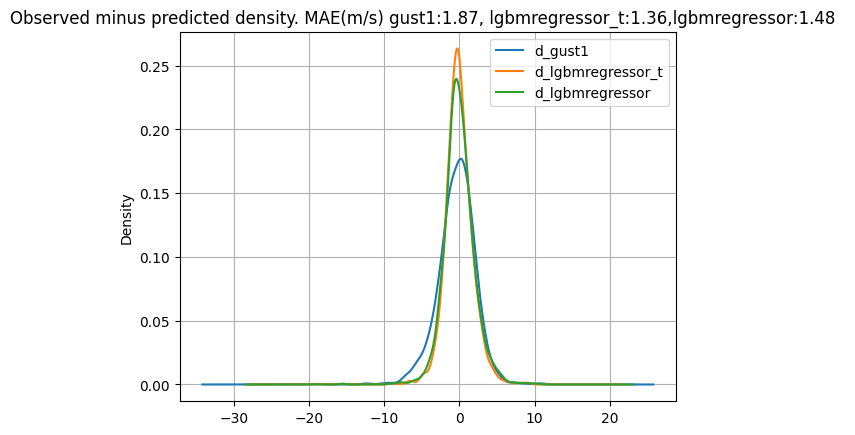

In [11]:
# @title Add time variables

df_all["hour"] = df_all.index.hour
df_all["month"] = df_all.index.month
df_all["dayofyear"] = df_all.index.dayofyear
df_all["weekofyear"] = df_all.index.isocalendar().week.astype(int)

#numpy randomseed
np.random.seed(1)

# target variable
Y = df_all.gust_o
X = df_all[["wind_gust0","mod0","wind_gust1","mod1","wind_gust2","mod2","hour",
            "month","dayofyear","weekofyear"]]

MAE_t = []
for t in range (0,10):
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, )
  ml_model = LGBMRegressor(n_estimators=200).fit(X_train,y_train)
  y_pred = ml_model.predict(X_test)
  MAE_t.append(round(mean_absolute_error(y_test,y_pred),2))
  print("machine learning number:",t)
  df = pd.DataFrame({"y_test":y_test},index=y_test.index)
  df["y_pred"] = y_pred
  df["diff"] = df["y_pred"]-df["y_test"]
  print(df.describe())

print("Mean absolute value all machine learning models")
df_r=pd.DataFrame({"MAE_t":MAE_t,});
df_r.describe()
#show results last algorithm
df_results = pd.concat([df_all,df],axis=1).dropna()[["mod0","wind_gust1","y_test","y_pred"]]
df_results ["d_lgbmregressor_t"]= df_results["y_test"]-df_results["y_pred"]
df_results ["d_gust1"] = df_results["y_test"]-df_results["wind_gust1"]
e_lgbm_t = mean_absolute_error(y_test,y_pred)
e_gust1 = mean_absolute_error(df_results.y_test.values,df_results.wind_gust1.values)
df_results["d_lgbmregressor"] = d_lgbmregressor
df_results[["d_gust1","d_lgbmregressor_t","d_lgbmregressor"]].plot(kind="kde",grid=True, title = "Observed minus predicted density. MAE(m/s) gust1:{:0.2f}, lgbmregressor_t:{:0.2f},lgbmregressor:{:0.2f}  ".format(e_gust1,e_lgbm_t,e_lgbm));


In [12]:
# @title T test two related samples. This is a test for the null hypothesis that two related samples have identical mean absolute error. Alternative hypothesis the mean absolute error from the sample with time variables is less than the mean absolute error of from the sample with time variables. Significance level (alpha) = 0.01
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(MAE, MAE_t, alternative="greater")

print("\nMAE without time variables:", np.round(MAE,3))
print("\nMAE with time variables:", np.round(MAE_t,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:
    print("\nwe are rejecting null hypothesis  H0: MAE machine learning without time variables = MAE machine learning with time variables")
    print("\nwe are accepting alternative hypothesis: the MAE of the sample with time variables inputs is less than MAE of the sample without time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: MAE machine learning without time variables = MAE machine learning with time variables")

#select mae_ml
mae_ml = np.round(MAE_t,3)[-1]


MAE without time variables: [1.47 1.48 1.47 1.45 1.5  1.48 1.47 1.5  1.53 1.48]

MAE with time variables: [1.33 1.34 1.34 1.3  1.37 1.35 1.33 1.36 1.38 1.36]

alpha:  0.01

p_value point:  2.895982227210226e-12

we are rejecting null hypothesis  H0: MAE machine learning without time variables = MAE machine learning with time variables

we are accepting alternative hypothesis: the MAE of the sample with time variables inputs is less than MAE of the sample without time variables inputs


In [14]:
# @title Save algorithm
import pickle
from sklearn.pipeline import Pipeline

score ={"MAE_met":mae_met,"MAE_ml":mae_ml}
estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe,"score":score}
pickle.dump(al_file, open("/content/drive/MyDrive/Colab Notebooks/Pontevedra_Ria/algorithms/gust_marin_d0.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMRegressor(n_estimators=200))])
